# Regressão Linear Simples

## Gradiente descendente

Neste documento usarei gradiente descendente como estratégia de otimização para regressão linear. O código abaixo é executado com uma base de dados (income.csv) contendo anos de escolaridade versus salário. Usarei, a princípio, a taxa de aprendizagem de 0.0001 e o número de iterações igual a 1000.

Percebe-se que, após 1000 iterações, o valor de **b ou w0** (coeficiente linear) foi de -0.18234255376510086, o valor de **m ou w1**(coeficiente angular) foi de 3.262182267596014 e o erro foi de 103.39842291729676. Inicialmente, para **b** = **m** = 0, o erro era de 2946.6344970460195.

In [1]:
from numpy import *

def compute_error_for_given_points(b, m, points):
    total_error = 0
    
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]        
        total_error += (y - (m * x + b)) **2 
        
    return total_error / float(len(points))
        


def step_gradient(b_current, m_current, points, learning_rate):
    # gradient descent
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
        
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b, new_m]
    

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]
        

def run():
    points = genfromtxt('income.csv', delimiter=",")    
    learning_rate = 0.0001
    #y = mx + b (slope formula)
    initial_b = 0
    initial_m = 0
    num_iterations = 1000
       
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_given_points(b, m, points)))
    

run()


Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
After 1000 iterations b = -0.18234255376510086, m = 3.262182267596014, error = 103.39842291729676


### RSS

Vamos agora imprimir o RSS (soma dos erros quadrados) a cada iteração do gradiente descendente. 
Para isso, definirei a função *compute_rss* que será chamara a cada iteração da função *gradient_descent_runner*.

Como é possível perceber, o valor do RSS cai a cada iteração, sendo essa queda maior nas primeiras iterações. Para facilitar a visualização, um gráfico com os valores do RSS foi plotado. O eixo x, que representa o número de iterações, é exibido em escala logarítmica, para que fique mais fácil de visualizar o valor do RSS decrescendo.
 

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...


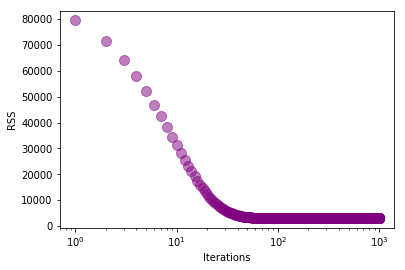

After 1000 iterations b = -0.18234255376510086, m = 3.262182267596014, error = 103.39842291729676


In [3]:
import matplotlib.pyplot as plt

def compute_rss(b, m, points):
    total_error = 0
    
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]        
        total_error += (y - (m * x + b)) **2 
        
    return total_error
        
def plot_rss(rss_array):
    iterations_array = range(1, len(rss_array)+1)
    plt.scatter(iterations_array, rss_array, alpha=0.5, s=100, c="purple",)
    plt.xlabel("Iterations")
    plt.ylabel("RSS")
    plt.xscale('log')
    plt.show()

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    rss_array = []
    
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        
        rss_current = compute_rss(b, m, points)
        rss_array.append(rss_current)        
        #print('RSS = {0} - ITERATION = {1}'.format(rss_current, i+1))
    
    plot_rss(rss_array)   
    
    return [b, m]

run()

## Variar número de iterações e taxa de aprendizado

A seguir, irei mudar as variáveis **num_iterations** e **learning_rate** até que os valores de **b** e **m** se aproximem de -39 e 5, respectivamente.

Para isso, irei modificar o loop da função *gradient_descent_runner*. No lugar o *for*, colocarei um *while* até que os valores de **b** e **m** se aproximem do desejado. Assim, a única preocupação fica sendo variar a taxa de aprendizado (variável **learning_rate**). 

Após variar a taxa de aprendizado entre 0.0001 e 0.004, percebi duas coisas: 1) No intervalo de 0.0001 até 0.003 (à medida que esse valor aumenta), o número de iterações até que o algoritmo convirja diminui. Isso é óbvio, porque o algoritmo está aprendendo mais rápido. 2) Também percebi que, aparentemente, o valor 0.003 é ótimo nesse caso. Isso porque se o valor for maior ou igual a 0.004, o algoritmo erra e retorna valores *nan*.

Então, como é possível perceber pela saída, os valores necessários para que **b** se aproxime de -39 (b = -39.00012177355754) e **m** se aproxime de 5 (m = 5.57292537447843) são: **num_iterations = 15724** e **leaning_rate = 0.003**. 

In [4]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate):
    b = starting_b
    m = starting_m
    
    iteration = 0;
    while (not (b > -40 and b < -39)) or (not (m > 5 and m < 6)):    
        
        b, m = step_gradient(b, m, array(points), learning_rate)
        
        iteration += 1
        #print('b = {0}, m = {1}, iteration = {2}'.format(b, m, iteration))        
            
    print('After {0} iterations, with leaning rate = {1}: b = {2}, m = {3}'.format(iteration, learning_rate, b, m))
    return [b, m]
        
def run():
    points = genfromtxt('income.csv', delimiter=",")
    #hyper parameters
    learning_rate = 0.003
    
    #y = mx + b (slope formula)
    initial_b = 0
    initial_m = 0  
    
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate)
       

run()

After 15724 iterations, with leaning rate = 0.003: b = -39.00012177355754, m = 5.57292537447843


## Gradiente como critério de parada

Agora, vamos utilizar o gradiente como critério de parada. Para isso, mudarei a condição do *while* da função *gradient_descent_runner*. 

Para usar o gradiente no *while*, utilizei a raiz quadrada da soma dos quadrados das variáveis **b_gradient** e **m_gradient**. Esse valor deve ser menor que a tolerância definida para que o algoritmo convirja.

Para que os valores de **b** e **m** ficassem próximos aos valores encontrados no tópico anterior, a tolerância definida (variável **tolerance**) foi de **0.04**.

Um gráfico com os valores do gradiente vs. o número de iterações é exibido. É possível perceber melhor que o gradiente está decrescendo porque o eixo x, que representa o número de iterações, está em escala logarítmica.


After 15938 iterations, b = -39.026550442698195, m = 5.574498619168578: Gradient = 0.03999838727484985 and Tolerance = 0.04


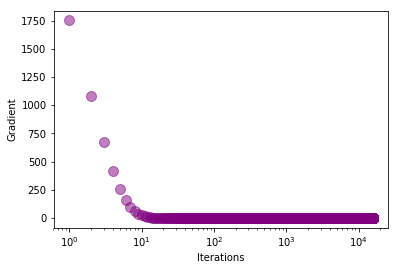

Execution Time: 1.1011512279510498 seconds


In [5]:
import time
import matplotlib.pyplot as plte

def step_gradient(b_current, m_current, points, learning_rate):
    #gradient descent
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
        
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
        
        
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    
    
    return [new_b, new_m, b_gradient, m_gradient]

def plot_gradient(gradient_array):
    iterations_array = range(1, len(gradient_array)+1)
    plte.scatter(iterations_array, gradient_array, alpha=0.5, s=100, c="purple",)
    plte.xlabel("Iterations")
    plte.ylabel("Gradient")
    plte.xscale('log')
    plte.show()

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations, tolerance):
    b = starting_b
    m = starting_m
    b_gradient = 0 
    m_gradient = 0    
    gradient = None
    gradient_array = []
    
    iterations = 0;
    while gradient == None or gradient >= tolerance:
        
        b, m, b_gradient, m_gradient = step_gradient(b, m, array(points), learning_rate)                   
        
        gradient = math.sqrt(b_gradient**2 + m_gradient**2)
        gradient_array.append(gradient)
        iterations += 1
        #print('gradient = {0}, b = {1}, m = {2} - ITERATION {3}'.format(gradient, b, m, iterations))
        
    print('After {0} iterations, b = {1}, m = {2}: Gradient = {3} and Tolerance = {4}'.format(iterations, b, m, gradient, tolerance))
    
    plot_gradient(gradient_array)
    
    return [b, m]
        

def run():
    points = genfromtxt('income.csv', delimiter=",")
    #hyper parameters
    learning_rate = 0.003
    #y = mx + b (slope formula)
    initial_b = 0
    initial_m = 0
    num_iterations = 1000
    tolerance = 0.04
       
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations, tolerance)
    

start_time = time.time()   
run()
print("Execution Time: {0} seconds".format(time.time() - start_time))

## Forma fechada de calcular os coeficientes de regressão

Defini uma nova função para o cálculo dos valores de **b** e **m**, a função *simple_reg*.
A cada iteração chamei a nova função. 
O número de iterações (variável **num_iterations**) foi setado para **15938**, mesma quantidade de iterações retornada no tópico anterior. Dessa forma, podemos comparar  o tempo de execução dos dois algoritmos.

Como é possível perceber, essa forma fechada de calcular os coeficientes mostrou-se mais rápida que a forma do algoritmo do tópico anterior (Ver saídas: **Execution Time:....**).

In [6]:
def simple_reg(points):
    tempx = 0
    tempy = 0
    N = len(points)
    
    for i in range(0, N):
        xi = points[i, 0]
        yi = points[i, 1]
        tempx += xi
        tempy += yi
        
    x = tempx / float(N)
    y = tempy / float(N)
    
    a = 0
    b = 0    
    for i in range(0, N):
        xi = points[i, 0]
        yi = points[i, 1]
        a = a + (xi - x) * (yi - y)
        b = b + (xi - x)**2
        
    w1 = a/b
    w0 = y - w1*x
    return [w0,w1]
    
def gradient_descent_runner(points, starting_b, starting_m, num_iterations):
    b = starting_b
    m = starting_m
    b_gradient = 0 
    m_gradient = 0    
    gradient = None
    
    for i in range(0, num_iterations):        
        b, m = simple_reg(array(points))                  
        
    print('After {0} iterations, b = {1}, m = {2}'.format(num_iterations, b, m))  
    
    
    return [b, m]
        

def run():
    points = genfromtxt('income.csv', delimiter=",")
    
    #y = mx + b (slope formula)
    initial_b = 0
    initial_m = 0
    num_iterations = 15938 
       
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, num_iterations)
    

start_time = time.time()   
run()
print("Execution Time: {0} seconds".format(time.time() - start_time))

After 15938 iterations, b = -39.44625667909617, m = 5.599482874119919
Execution Time: 0.7396163940429688 seconds
